In [1]:
#libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
os.chdir(r'C:\Users\ASUS\Desktop\DataSet\credit-worthiness')

In [3]:
df = pd.read_csv('trainingData.csv')
print(df.shape)
display(df)

(40000, 21)


,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39996,Pusad,45,F,Muslim,Buffalo rearing,none,78000.0,4000.0,0,0,1.0,T2,2,600.0,1.0,1.0,Animal husbandry,12,12,8000.0
39996,39997,Pusad,35,F,ST,Tailoring,none,48000.0,4000.0,0,3,1.0,T2,4,800.0,1.0,1.0,Apparels,12,12,8000.0
39997,39998,Pusad,35,F,Sc,Goat rearing,none,48000.0,3500.0,0,2,1.0,T2,3,600.0,1.0,1.0,Meat Businesses,12,12,8000.0
39998,39999,Pusad,28,F,Sc,Goat rearing,none,48000.0,4000.0,0,3,1.0,T2,4,600.0,1.0,1.0,Meat Businesses,12,12,8000.0


In [4]:
df.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,40000.00000,40000.00000,4.000000e+04,39880.000000,40000.000000,40000.00000,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000,40000.000000,40000.000000,4.000000e+04
mean,20000.50000,55.15990,3.764021e+04,3810.875401,0.044900,1.13710,0.972489,26.641000,552.804750,0.686369,0.753216,12.032225,21.761175,8.412593e+03
std,11547.14972,3830.35566,2.873912e+04,4592.958009,0.222003,1.07384,0.163568,4749.995485,4596.921905,0.464028,0.255337,1.367473,16.682458,1.359694e+04
min,1.00000,2.00000,0.000000e+00,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10000.75000,29.00000,1.440000e+04,2500.000000,0.000000,0.00000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20000.50000,35.00000,3.600000e+04,3500.000000,0.000000,1.00000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30000.25000,42.00000,5.600000e+04,4000.000000,0.000000,2.00000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.00000,766105.00000,1.200000e+06,240000.000000,3.000000,7.00000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06



# EDA

In [5]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values

features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

city 0.0466  % missing values
social_class 0.1314  % missing values
primary_business 0.0006  % missing values
secondary_business 0.131  % missing values
monthly_expenses 0.003  % missing values
home_ownership 0.0095  % missing values
type_of_house 0.0174  % missing values
sanitary_availability 0.0052  % missing values
water_availabity 0.1313  % missing values
loan_purpose 0.0006  % missing values


In [6]:
df.isnull().sum()

Id                          0
city                     1864
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

Since they are many missing values, we need to find the relationship between missing values and loan_amount
Let's plot some diagram for this relationship


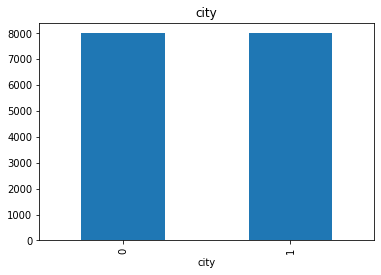

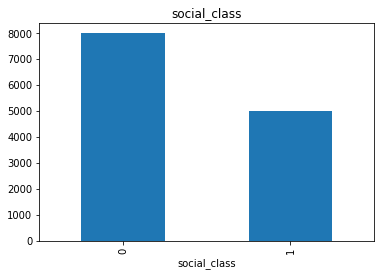

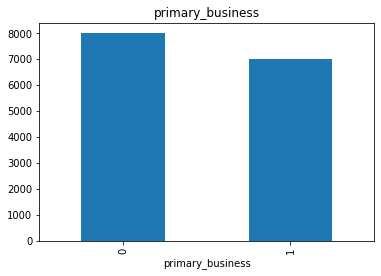

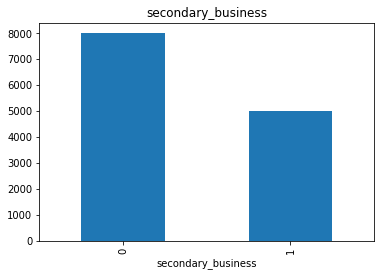

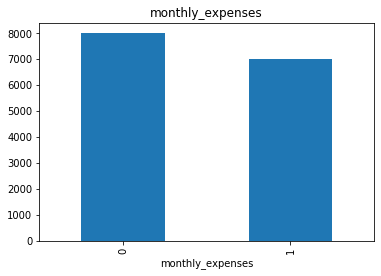

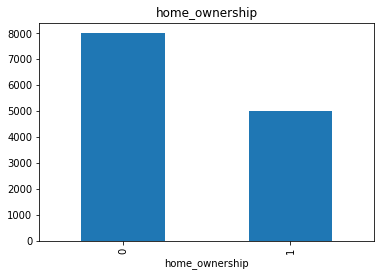

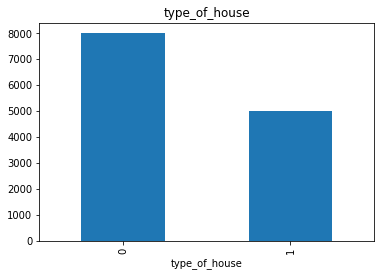

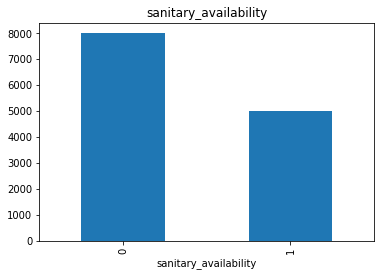

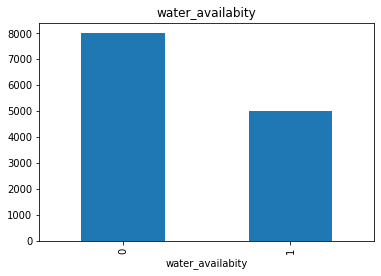

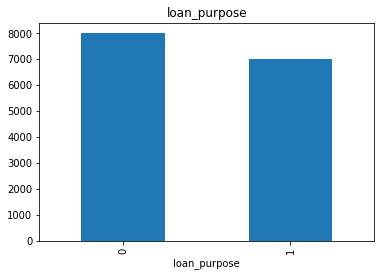

In [7]:
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or otherwise zero 
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['loan_amount'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here with the relation between the missing values and the dependent variable is clearly visible.
 So we need to replace these nan values with something meaningful

In [8]:
# Dataframe of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# Display and visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  14


,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
0,1,22,36000.0,5000.0,0,2,1.0,4,70.0,1.0,0.5,12,12,5000.0
1,2,21,94000.0,3600.0,1,1,1.0,4,80.0,1.0,0.5,12,50,7500.0
2,3,24,48000.0,4000.0,0,2,1.0,4,50.0,1.0,0.5,12,12,5000.0
3,4,26,7000.0,5000.0,0,2,1.0,5,50.0,1.0,0.5,12,50,7500.0
4,5,23,36000.0,3500.0,0,0,1.0,1,112.0,1.0,0.5,12,12,5000.0


In [9]:
# Numerical variables are usually of 2 type
# 1. Discrete Variables and 2. Continous variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<20 and feature not in ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

df[discrete_feature].head()

Discrete Variables Count: 6


,old_dependents,young_dependents,home_ownership,sanitary_availability,water_availabity,loan_tenure
0,0,2,1.0,1.0,0.5,12
1,1,1,1.0,1.0,0.5,12
2,0,2,1.0,1.0,0.5,12
3,0,2,1.0,1.0,0.5,12
4,0,0,1.0,1.0,0.5,12


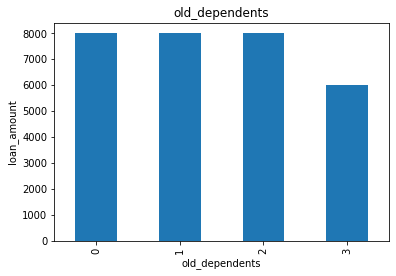

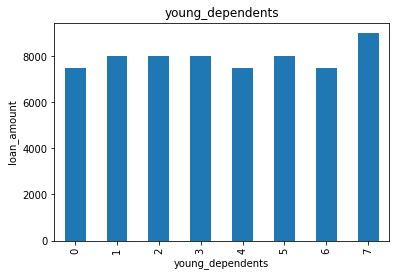

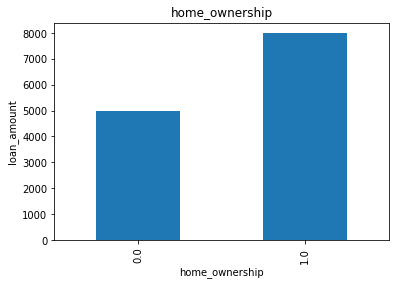

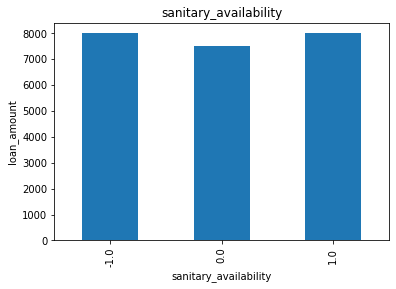

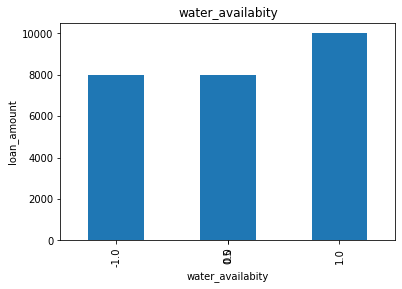

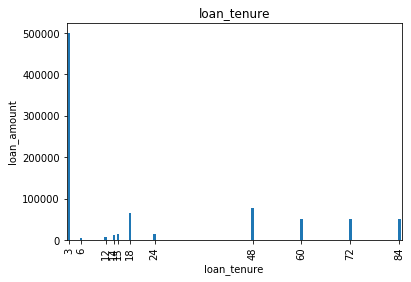

In [10]:
## Lets Find the realtionship between Discrete Variables and loan_amount

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['loan_amount'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('loan_amount')
    plt.title(feature)
    plt.show()

In [11]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

df[continuous_feature].head()

Continuous feature Count 7


,age,annual_income,monthly_expenses,occupants_count,house_area,loan_installments,loan_amount
0,22,36000.0,5000.0,4,70.0,12,5000.0
1,21,94000.0,3600.0,4,80.0,50,7500.0
2,24,48000.0,4000.0,4,50.0,12,5000.0
3,26,7000.0,5000.0,5,50.0,50,7500.0
4,23,36000.0,3500.0,1,112.0,12,5000.0


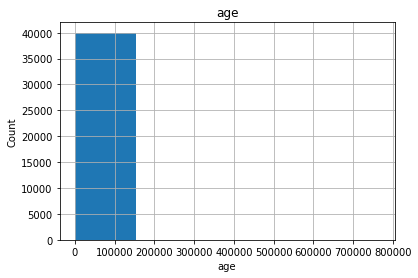

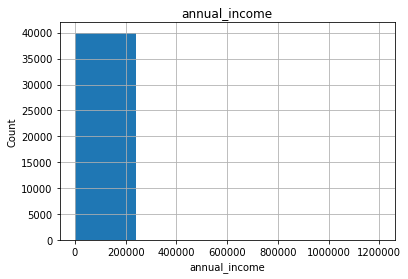

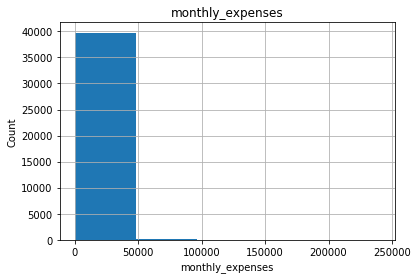

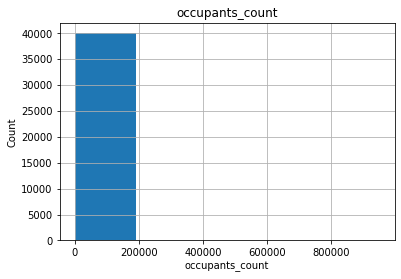

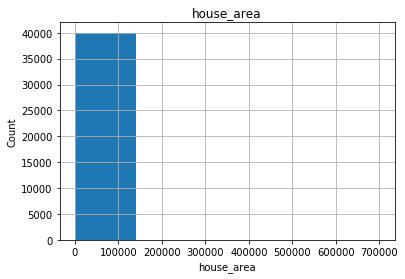

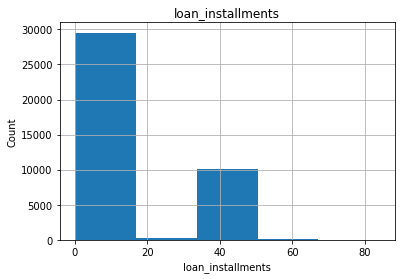

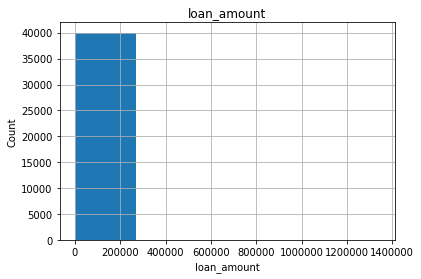

In [12]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    
    data[feature].hist(bins=5)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## We will be using logarithmic transformation

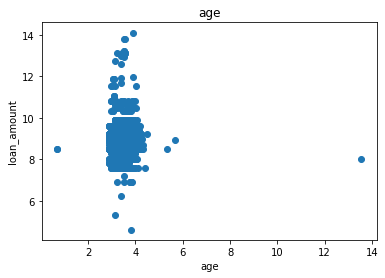

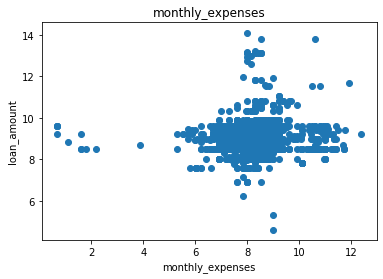

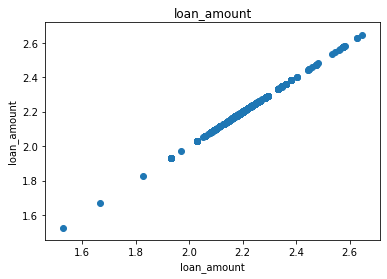

In [13]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['loan_amount']=np.log(data['loan_amount'])
        plt.scatter(data[feature],data['loan_amount'])
        plt.xlabel(feature)
        plt.ylabel('loan_amount')
        plt.title(feature)
        plt.show()

# outliers

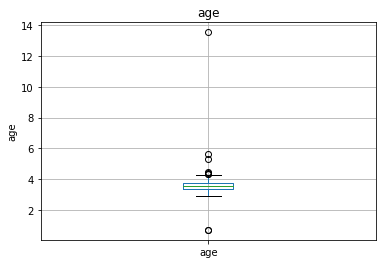

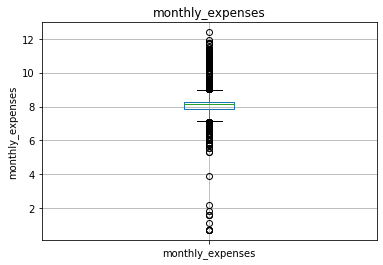

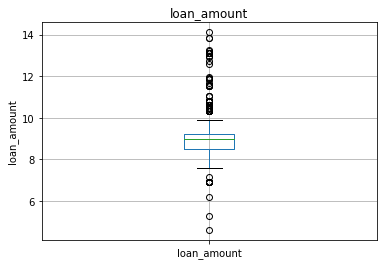

In [14]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [15]:
# Dataframe of categorical features
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
df[categorical_features].head()

,city,sex,social_class,primary_business,secondary_business,type_of_house,loan_purpose
0,Dhanbad,F,Mochi,Tailoring,Others,R,Apparels
1,Manjapra,F,OBC,Tailoring,none,T1,Apparels
2,Dhanbad,M,Nai,Beauty salon,Others,T1,Beauty Salon
3,NaN,F,OBC,Tailoring,none,T1,Apparels
4,Nuapada,F,OBC,General store,Agriculture,T1,Retail Store


In [16]:
# let's check the categories present in a features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is city and number of categories are 857
The feature is sex and number of categories are 3
The feature is social_class and number of categories are 520
The feature is primary_business and number of categories are 442
The feature is secondary_business and number of categories are 6
The feature is type_of_house and number of categories are 4
The feature is loan_purpose and number of categories are 38


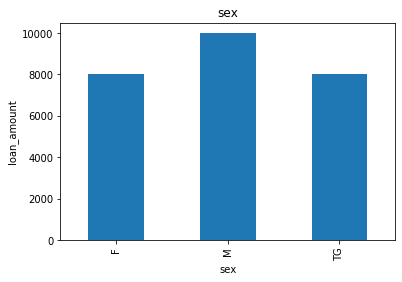

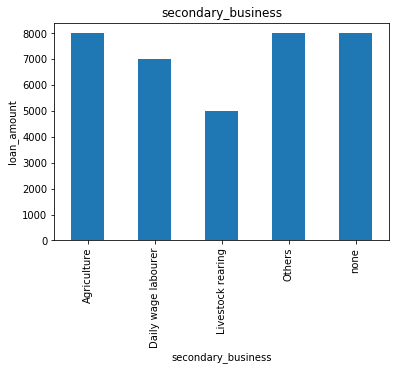

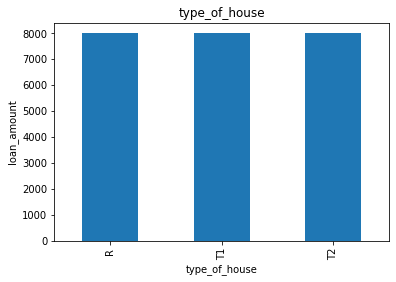

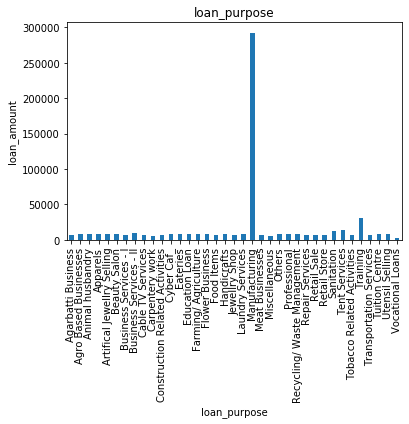

In [17]:
#Finding out the relationship between categorical variable and dependent feature loan_amount 
#As there are more categories in some features we will remove them, even if we do visualizations with them there will be no use

cat_fea = [feature for feature in categorical_features if feature not in ['city','social_class','primary_business']]
for feature in cat_fea:
    data=df.copy()
    data.groupby(feature)['loan_amount'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('loan_amount')
    plt.title(feature)
    plt.show()

People who are taking loans for the purpose of manufacturing are very less compare to others but the loan  amount given to manufacturing purpose was high. Around rs.300000 was given for this purpose.

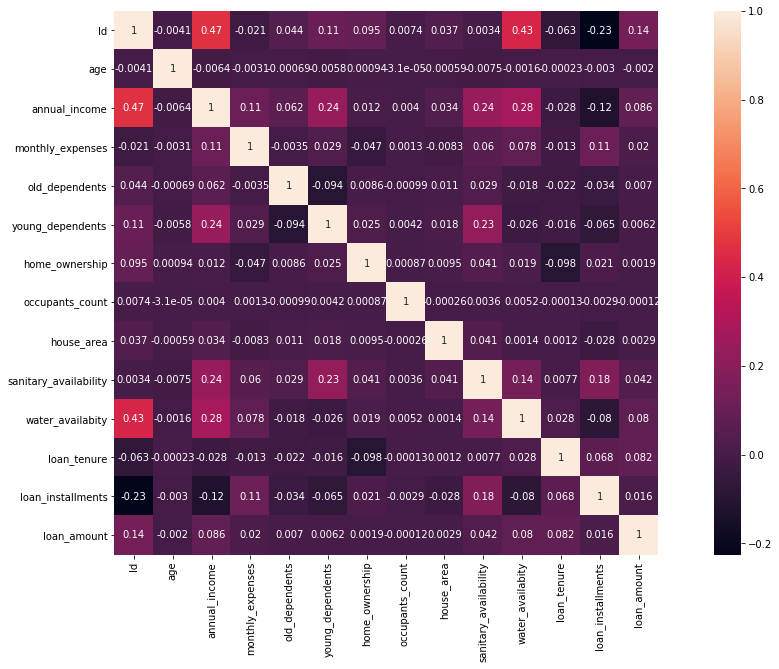

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, square=True,annot_kws={'size': 10})

In [17]:

def categorize_loans(loan_amount):
    if loan_amount < 9999:
        return "Low"
    elif loan_amount < 100000:
        return "Medium"
    else:
        return "High"

In [26]:
df['loans Category'] = df['loan_amount'].apply(categorize_loans)

In [27]:
df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount,loans Category
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0,Low
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0,Low
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0,Low
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0,Low
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0,Low


In [21]:
df_sample=df[['old_dependents','young_dependents','city','loan_amount']]
df_sample.head(10)

,old_dependents,young_dependents,city,loan_amount
0,0,2,Dhanbad,5000.0
1,1,1,Manjapra,7500.0
2,0,2,Dhanbad,5000.0
3,0,2,NaN,7500.0
4,0,0,Nuapada,5000.0
5,0,0,Nuapada,5000.0
6,0,1,Dhanbad,5000.0
7,0,2,NaN,7500.0
8,0,2,Dhanbad,5000.0
9,0,3,Dhanbad,5000.0


In [22]:
df_sample['loans Category']=df_sample['loan_amount'].apply(categorize_loans)
df_sample.head(10)

C:\Users\ASUS\anaconda03\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,old_dependents,young_dependents,city,loan_amount,loans Category
0,0,2,Dhanbad,5000.0,Low
1,1,1,Manjapra,7500.0,Low
2,0,2,Dhanbad,5000.0,Low
3,0,2,NaN,7500.0,Low
4,0,0,Nuapada,5000.0,Low
5,0,0,Nuapada,5000.0,Low
6,0,1,Dhanbad,5000.0,Low
7,0,2,NaN,7500.0,Low
8,0,2,Dhanbad,5000.0,Low
9,0,3,Dhanbad,5000.0,Low


In [23]:
df_sample['loans Category'].value_counts()

Low       26470
Medium    13501
High         29
Name: loans Category, dtype: int64

# Storing Data in Mongodb

In [30]:
import json
records=json.loads(df.T.to_json()).values()

In [25]:
!pip install pymongo

In [36]:

import pymongo
client = pymongo.MongoClient('mongodb://127.0.0.1:27017/')
db=client["credit-worthiness"]
col=db["loanscredits"]

In [40]:
col.insert_many(records)

In [19]:
df.corr()['loan_amount'].sort_values(ascending=False)

loan_amount              1.000000
Id                       0.141249
annual_income            0.085632
loan_tenure              0.082230
water_availabity         0.079910
sanitary_availability    0.042241
monthly_expenses         0.019569
loan_installments        0.015981
old_dependents           0.006997
young_dependents         0.006200
house_area               0.002874
home_ownership           0.001939
occupants_count         -0.000125
age                     -0.001969
Name: loan_amount, dtype: float64

Understanding customers loan tenure, loan installments, loan amount is vey important. 

In [20]:
df.groupby(['sex','home_ownership']).agg({'loan_tenure':['min','max'], 'loan_installments':['min','max'], 'loan_amount':['sum']})

loan_tenure     loan_installments      loan_amount
                           min max               min max          sum
sex home_ownership                                                   
F   0.0                      6  72                 0  74    7272800.0
    1.0                      3  48                 1  74  305628900.0
M   0.0                      6  84                 2  84    1750900.0
    1.0                     12  84                 2  84   19529100.0
TG  1.0                     12  12                 2  50      63000.0

In [21]:
#knowing more on loan installments

grouped = df.groupby('sex').agg({"loan_installments":['min', 'max', 'mean']}) 
# Using ravel, and a string join, we can create better names for the columns
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
grouped.head()

C:\Users\ASUS\anaconda03\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  """


,loan_installments_min,loan_installments_max,loan_installments_mean
sex,,,
F,0,74,22.037425
M,2,84,17.378743
TG,2,50,21.428571


In [22]:
grouped1 =df.groupby('sex')
sums = grouped1['loan_installments'].sum().add_suffix('_sum')
avgs = grouped1['loan_installments'].mean().add_suffix('_avg')
new_grouped = pd.concat([sums,avgs],axis=1)

In [23]:
##knowing more on loan tenure
grouped2 = df.groupby('sex').agg({"loan_tenure":['min', 'max', 'mean']}) 
grouped2.columns = ["_".join(x) for x in grouped2.columns.ravel()]
grouped2.head()

C:\Users\ASUS\anaconda03\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  This is separate from the ipykernel package so we can avoid doing imports until


,loan_tenure_min,loan_tenure_max,loan_tenure_mean
sex,,,
F,3,72,12.002950
M,6,84,12.496837
TG,12,12,12.000000


In [24]:
df.groupby('sex',as_index=False).agg({'old_dependents':sum,'young_dependents':sum,'loan_amount':sum})

,sex,old_dependents,young_dependents,loan_amount
0,F,1460,42971,315099200.0
1,M,336,2503,21341500.0
2,TG,0,10,63000.0


As there were young dependents more we can conclude that what ever the desired loan they wanted and bank as given, they can pay back to bank. 
Hence credit worthiness is high 

In [25]:
df.groupby('sex',as_index=False).agg({'annual_income':['count','min','max'],'monthly_expenses':['count','min','max'],'loan_amount':['count','min','max']})

sex annual_income                     monthly_expenses                    \
              count      min        max            count     min       max   
0   F         37622      0.0  1200000.0            37503     2.0  240000.0   
1   M          2371      0.0   360000.0             2370   200.0  150000.0   
2  TG             7  12000.0   108000.0                7  2000.0    6000.0   

  loan_amount                     
        count     min        max  
0       37622   100.0  1343000.0  
1        2371   200.0   150000.0  
2           7  5000.0    15000.0

From the data which we got -loan customers, Females are getting more loans and earning more money than males. may be loans are taken by the males from female accounts.

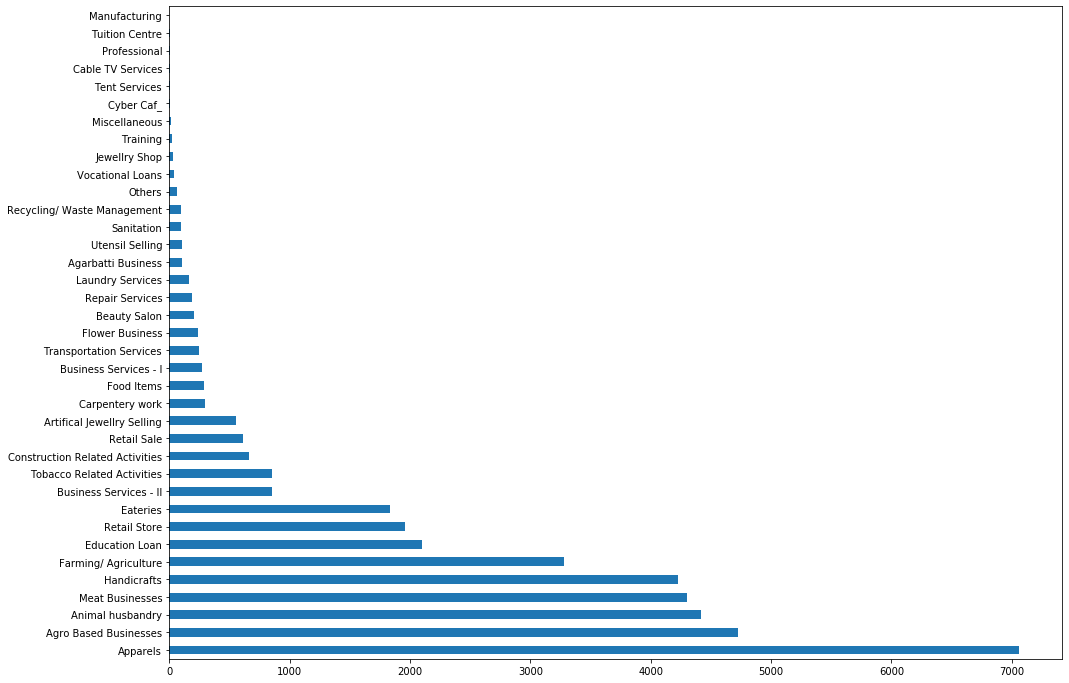

In [26]:
df['loan_purpose'].value_counts().plot(kind='barh',figsize=(16,12))

people who wants to take loans are in need of doing something. majority people wants loan for Apparels.

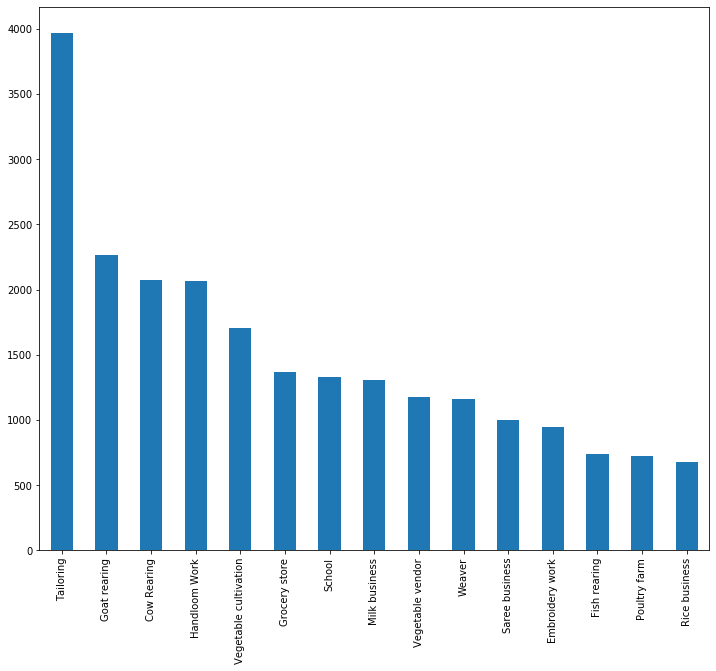

In [27]:
df['primary_business'].value_counts()[:15].plot(kind='bar',figsize=(12,10))

We can see the order of primary business of a customers. As customers are in rural areas Tailoring, Goat rearing, Cow rearing, Handloom work plays an important role and prefering these.

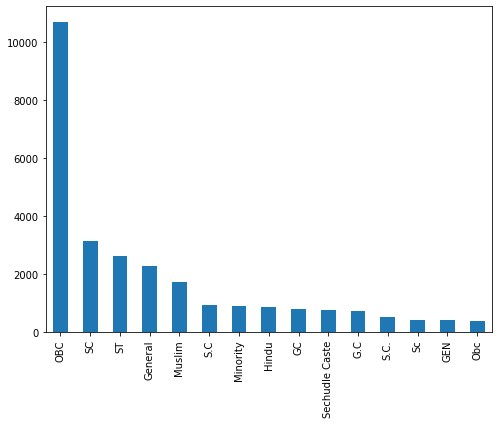

In [28]:
df['social_class'].value_counts()[:15].plot(kind='bar',figsize=(8,6))

We can see same kind of data is repeating as different category and thus duplicating more. for now lets treat them as same. 
 we can clearly say that OBC category are more and follow up by SC and ST

In [29]:
## Based on our data we can do some analysis to check or learn on customers capabilities 
# We can analyse which person-gender present in city and some details of them.  
# We can do analyse by person's class, annual_income, or with other factors
count1 = df.groupby(['city','social_class','sex','annual_income'])['Id'].count().to_frame().rename(columns={'Id':'count'}).reset_index()
count1

,city,social_class,sex,annual_income,count
0,#NAME?,SC,F,48000.0,2
1,(KODANGAL MANDAL) NARVA,BC,F,54000.0,1
2,"24 PARGANAS,SOUTH",GENL,F,36000.0,1
3,752102,General,F,38000.0,1
4,752102,OBC,F,48000.0,1
...,...,...,...,...,...
7066,vadakkencherry,christian,F,63600.0,1
7067,vadakkencherry,christian,F,84000.0,2
7068,village,NT,M,25000.0,1
7069,wadhawan,OBC,F,60000.0,1


In [30]:
count2 = df.groupby(['sex','monthly_expenses','annual_income','primary_business'])['Id'].count().to_frame().rename(columns={'Id':'count'}).reset_index()
count2

,sex,monthly_expenses,annual_income,primary_business,count
0,F,2.0,36000.0,Tailoring,1
1,F,2.0,48000.0,Tea stall,2
2,F,2.0,60000.0,Pottery making,2
3,F,3.0,9600.0,School,1
4,F,5.0,0.0,Tailoring,2
...,...,...,...,...,...
15566,TG,4000.0,36000.0,Education Loan,1
15567,TG,4100.0,14400.0,Poultry farm,1
15568,TG,4200.0,60000.0,Fish rearing,1
15569,TG,4300.0,12000.0,Embroidery work,1


In [31]:
count3 = df.groupby(['house_area','loan_purpose','loan_amount','sex'])['Id'].count().to_frame().rename(columns={'Id':'count'}).reset_index()
count3

,house_area,loan_purpose,loan_amount,sex,count
0,0.0,Agarbatti Business,5000.0,F,26
1,0.0,Agarbatti Business,7500.0,F,15
2,0.0,Agro Based Businesses,2000.0,F,3
3,0.0,Agro Based Businesses,3000.0,F,89
4,0.0,Agro Based Businesses,3500.0,F,1
...,...,...,...,...,...
5830,125000.0,Agro Based Businesses,5000.0,F,1
5831,150000.0,Handicrafts,8000.0,F,1
5832,200000.0,Apparels,8000.0,F,1
5833,500000.0,Retail Store,8000.0,TG,1


In [32]:
count4 = df.groupby(['loan_tenure','loan_installments','loan_amount','sex'])['Id'].count().to_frame().rename(columns={'Id':'count'}).reset_index()
count4

,loan_tenure,loan_installments,loan_amount,sex,count
0,3,1,500000.0,F,2
1,6,2,2500.0,F,25
2,6,2,2500.0,M,15
3,6,6,5000.0,F,5
4,6,6,6000.0,F,318
...,...,...,...,...,...
204,48,48,103000.0,F,2
205,60,60,50000.0,F,1
206,72,72,50000.0,F,1
207,72,72,50000.0,M,1


In [33]:
#Pivot table

pt1 = df.pivot_table(index='sex', columns='loan_tenure', values='loan_amount', aggfunc=np.sum, fill_value = 0)
pt1

loan_tenure,3,6,12,14,15,18,24,48,60,72,84
sex,,,,,,,,,,,
F,1000000,3159500,305454600,0,720000,1150100,3209000,306000,50000,50000,0
M,0,37500,18876300,133500,0,0,2144200,0,0,50000,100000
TG,0,0,63000,0,0,0,0,0,0,0,0


In [34]:
pt2 = df.pivot_table(index='sex', columns='loan_installments', values='loan_amount', aggfunc=np.sum, fill_value = 0)
pt2

loan_installments,0,1,2,4,6,8,12,15,18,24,48,50,51,52,53,55,58,60,72,74,84
sex,,,,,,,,,,,,,,,,,,,,,
F,40000,1000000,542500,1646000,3107000,311000,216273100,720000,1150100,2903000,306000,86280500,365000,30000,145000,125000,0,50000,50000,55000,0
M,0,0,87500,0,0,707000,16818300,0,0,1287200,0,2153000,5000,0,0,0,133500,0,50000,0,100000
TG,0,0,10000,0,0,0,40000,0,0,0,0,13000,0,0,0,0,0,0,0,0,0


By observations we can say that Female people are taking loans more and thus they have more of loan tenure and also the loan installments which they need to pay.

In [35]:
pt3 = df.pivot_table(index='sex', columns=['annual_income'], values='loan_amount', aggfunc=np.sum, fill_value = 0)
pt3

annual_income,0.0,24.0,25.0,28.0,30.0,40.0,45.0,900.0,1000.0,1200.0,1400.0,1500.0,1600.0,1800.0,2000.0,2050.0,2100.0,2200.0,2300.0,2400.0,2500.0,2600.0,2650.0,2700.0,2800.0,2850.0,2900.0,3000.0,3100.0,3200.0,3250.0,3300.0,3400.0,3500.0,3600.0,3700.0,3800.0,3900.0,4000.0,4200.0,4400.0,4500.0,4600.0,4700.0,4800.0,4900.0,5000.0,5500.0,6000.0,6600.0,7000.0,7200.0,7500.0,7800.0,8000.0,8400.0,8900.0,9000.0,9600.0,9800.0,10000.0,10200.0,10800.0,11400.0,11640.0,12000.0,12600.0,13000.0,13200.0,13800.0,14000.0,14200.0,14400.0,15000.0,15120.0,15360.0,15600.0,16000.0,16200.0,16800.0,17000.0,17400.0,18000.0,18800.0,19000.0,19200.0,19600.0,19800.0,20000.0,20400.0,21000.0,21396.0,21600.0,22000.0,22080.0,22200.0,22800.0,23000.0,24000.0,24600.0,25000.0,25200.0,25800.0,26000.0,26400.0,26500.0,27000.0,27400.0,27600.0,28000.0,28200.0,28700.0,28800.0,29000.0,29800.0,30000.0,31000.0,31200.0,31800.0,32000.0,32400.0,33000.0,33600.0,33800.0,34000.0,34800.0,35000.0,36000.0,37000.0,37200.0,37800.0,38000.0,38200.0,38400.0,39000.0,39200.0,39400.0,39600.0,39800.0,40000.0,40400.0,40800.0,41000.0,41300.0,41800.0,42000.0,42200.0,42400.0,42600.0,43000.0,43200.0,43400.0,43600.0,43800.0,44000.0,44400.0,44600.0,45000.0,45200.0,45600.0,46000.0,46200.0,46400.0,46800.0,47000.0,48000.0,48200.0,48400.0,48600.0,48800.0,49000.0,49200.0,49400.0,49600.0,49800.0,50000.0,50400.0,50500.0,50800.0,51000.0,51200.0,51400.0,51600.0,52000.0,52200.0,52400.0,52600.0,52800.0,53000.0,53200.0,53400.0,53600.0,53800.0,54000.0,54200.0,54400.0,54600.0,54800.0,55000.0,55200.0,55400.0,55600.0,55800.0,56000.0,56400.0,56600.0,56800.0,57000.0,57600.0,57800.0,58000.0,58200.0,58400.0,58800.0,59000.0,59200.0,59400.0,59500.0,59600.0,60000.0,60400.0,60600.0,61000.0,61200.0,61600.0,61800.0,62000.0,62400.0,62800.0,63000.0,63600.0,64000.0,64200.0,64400.0,64800.0,65000.0,65400.0,66000.0,66600.0,67000.0,67200.0,67500.0,67800.0,68000.0,68400.0,69000.0,69400.0,69600.0,70000.0,70200.0,70400.0,70800.0,71000.0,71400.0,72000.0,73000.0,73200.0,73800.0,74000.0,74400.0,75000.0,75600.0,76000.0,76200.0,76800.0,77000.0,78000.0,79000.0,79200.0,80000.0,80400.0,80800.0,81000.0,81600.0,82000.0,82200.0,82800.0,83000.0,84000.0,85000.0,85200.0,86000.0,86400.0,87000.0,87600.0,88000.0,88800.0,89000.0,90000.0,91200.0,91800.0,92000.0,92400.0,93000.0,93600.0,94000.0,95000.0,96000.0,97000.0,97800.0,98000.0,100000.0,100800.0,102000.0,103200.0,104000.0,106000.0,106500.0,108000.0,109000.0,110000.0,110400.0,114000.0,115000.0,116000.0,116400.0,117000.0,118000.0,119000.0,120000.0,124000.0,126000.0,128000.0,130000.0,132000.0,138000.0,140000.0,144000.0,145000.0,145200.0,150000.0,160800.0,165600.0,168000.0,175000.0,180000.0,184000.0,198000.0,200000.0,202800.0,215000.0,220000.0,222000.0,228000.0,235000.0,240000.0,264000.0,300000.0,304000.0,310000.0,360000.0,450000.0,596000.0,600000.0,720000.0,795134.0,850000.0,1000000.0,1200000.0
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,30112100,8000,10000,5000,15000,5000,9000,8000,13000,9000,5000,15000,0,24000,38000,5000,15000,10000,10000,71000,22500,10000,5000,5000,20000,5000,10000,106300,5000,40000,5000,20000,10000,34000,26800,12000,15000,30000,258000,30000,10000,35000,20000,0,118000,0,185000,13000,772200,5000,129000,1021900,18000,27500,233000,1321700,5000,81000,3384000,13000,215500,5000,1039100,10000,5000,13924700,8000,8000,787000,24000,143000,27000,7274300,1000000,8000,15000,937000,62500,20000,1695000,10000,44000,13207000,15000,98000,1191000,5000,4000,1263000,542000,105000,0,681800,1075000,13000,7000,55000,53000,23514600,29000,1212000,26500,0,326500,123000,10000,115000,10000,54300,264500,10000,10000,72000,27500,0,9380200,43000,14000,7500,282500,56000,106000,80000,9000,77000,15000,87

In [36]:
print(df.shape)
df

(40000, 21)


,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39996,Pusad,45,F,Muslim,Buffalo rearing,none,78000.0,4000.0,0,0,1.0,T2,2,600.0,1.0,1.0,Animal husbandry,12,12,8000.0
39996,39997,Pusad,35,F,ST,Tailoring,none,48000.0,4000.0,0,3,1.0,T2,4,800.0,1.0,1.0,Apparels,12,12,8000.0
39997,39998,Pusad,35,F,Sc,Goat rearing,none,48000.0,3500.0,0,2,1.0,T2,3,600.0,1.0,1.0,Meat Businesses,12,12,8000.0
39998,39999,Pusad,28,F,Sc,Goat rearing,none,48000.0,4000.0,0,3,1.0,T2,4,600.0,1.0,1.0,Meat Businesses,12,12,8000.0


# Feature Engineering

In [37]:
#there way always be a chance of data leakage so we need to split the data first and then apply feature engineering

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df['loan_amount'],test_size=0.2,random_state=0)

In [38]:
# shape of our data
X_train.shape, X_test.shape

((32000, 21), (8000, 21))

In [39]:
y_train.shape,y_test.shape

((32000,), (8000,))

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32000, 21)
(32000,)
(8000, 21)
(8000,)


In [41]:
X_train.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
21370,21371,Sambalpur,30,F,ST,Vegetable cultivation,Others,36000.0,4000.0,0,2,1.0,T1,4,1200.0,0.0,1.0,Farming/ Agriculture,12,12,8000.0
2470,2471,NaN,24,M,Muslin,Natural Fiber Crafts,none,50400.0,3000.0,0,0,0.0,T1,1,500.0,1.0,0.5,Handicrafts,24,24,15000.0
13767,13768,Noorsarai,50,F,OBC,Cow Rearing,Others,48000.0,2600.0,0,0,1.0,R,2,2722.0,0.0,1.0,Animal husbandry,12,12,5000.0
13316,13317,PUSAD,23,F,OBC,Mess Work,none,18000.0,3000.0,0,2,1.0,T2,2,600.0,1.0,1.0,Eateries,12,12,7500.0
26374,26375,SANDESHKHALI,20,F,OBC,Oil Vendor,Daily wage labourer,54000.0,4000.0,0,0,1.0,T1,2,900.0,1.0,1.0,Business Services - II,12,12,5000.0


# Handling missing values

In [42]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in X_train.columns if X_train[feature].isnull().sum()>1 and X_train[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(X_train[feature].isnull().mean(),4)))

city: 0.0468% missing values
social_class: 0.1324% missing values
primary_business: 0.0007% missing values
secondary_business: 0.1319% missing values
type_of_house: 0.0179% missing values
loan_purpose: 0.0007% missing values


In [43]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan1=[feature for feature in X_test.columns if X_test[feature].isnull().sum()>1 and X_test[feature].dtypes=='O']

for feature in features_nan1:
    print("{}: {}% missing values".format(feature,np.round(X_test[feature].isnull().mean(),4)))

city: 0.046% missing values
social_class: 0.1274% missing values
primary_business: 0.0006% missing values
secondary_business: 0.1274% missing values
type_of_house: 0.015% missing values
loan_purpose: 0.0006% missing values


In [44]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in X_train.columns if X_train[feature].isnull().sum()>1 and X_train[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(X_train[feature].isnull().mean(),4)))

monthly_expenses: 0.0031% missing value
home_ownership: 0.0094% missing value
sanitary_availability: 0.0054% missing value
water_availabity: 0.1323% missing value


In [45]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan1=[feature for feature in X_test.columns if X_test[feature].isnull().sum()>1 and X_test[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan1:
    print("{}: {}% missing value".format(feature,np.around(X_test[feature].isnull().mean(),4)))

monthly_expenses: 0.0026% missing value
home_ownership: 0.0098% missing value
sanitary_availability: 0.0045% missing value
water_availabity: 0.1274% missing value


In [46]:
X_train.isnull().sum()

Id                          0
city                     1496
age                         0
sex                         0
social_class             4236
primary_business           21
secondary_business       4222
annual_income               0
monthly_expenses           99
old_dependents              0
young_dependents            0
home_ownership            301
type_of_house             574
occupants_count             0
house_area                  0
sanitary_availability     172
water_availabity         4234
loan_purpose               21
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [47]:
X_test.isnull().sum()

Id                          0
city                      368
age                         0
sex                         0
social_class             1019
primary_business            5
secondary_business       1019
annual_income               0
monthly_expenses           21
old_dependents              0
young_dependents            0
home_ownership             78
type_of_house             120
occupants_count             0
house_area                  0
sanitary_availability      36
water_availabity         1019
loan_purpose                5
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [48]:
## Removing missing values in categorical features

def impute_nan(X_train,var):
    most_freq_cat = X_train[var].value_counts().index[0]
    X_train[var].fillna(most_freq_cat, inplace=True)
for feature in ['city','sex','social_class','primary_business','secondary_business','type_of_house','loan_purpose']:
    impute_nan(X_train,feature)
    
## Removing missing values in categorical features

def impute_nan(X_test,var):
    most_freq_cat1 = X_test[var].value_counts().index[0]
    X_test[var].fillna(most_freq_cat1, inplace=True)
for feature in ['city','sex','social_class','primary_business','secondary_business','type_of_house','loan_purpose']:
    impute_nan(X_test,feature)

C:\Users\ASUS\anaconda03\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [49]:
## Removing missing values in numerical features

na_cols = X_train.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in X_train.columns[1:]:
     if col in na_cols:
        if X_train[col].dtype != 'object':
             X_train[col] =  X_train[col].fillna(X_train[col].median()).round(0)
                

## Removing missing values in numerical features

na_cols1 = X_test.isna().any()
na_cols1= na_cols1[na_cols1 == True].reset_index()
na_cols1 = na_cols1["index"].tolist()
for col in X_test.columns[1:]:
     if col in na_cols1:
        if X_test[col].dtype != 'object':
             X_test[col] =  X_test[col].fillna(X_test[col].median()).round(0)

C:\Users\ASUS\anaconda03\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\ASUS\anaconda03\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [50]:
#Always important to check any missing values are present or not
X_train.isna().any()

Id                       False
city                     False
age                      False
sex                      False
social_class             False
primary_business         False
secondary_business       False
annual_income            False
monthly_expenses         False
old_dependents           False
young_dependents         False
home_ownership           False
type_of_house            False
occupants_count          False
house_area               False
sanitary_availability    False
water_availabity         False
loan_purpose             False
loan_tenure              False
loan_installments        False
loan_amount              False
dtype: bool

In [51]:
#Always important to check any missing values are present or not
X_test.isna().any()

Id                       False
city                     False
age                      False
sex                      False
social_class             False
primary_business         False
secondary_business       False
annual_income            False
monthly_expenses         False
old_dependents           False
young_dependents         False
home_ownership           False
type_of_house            False
occupants_count          False
house_area               False
sanitary_availability    False
water_availabity         False
loan_purpose             False
loan_tenure              False
loan_installments        False
loan_amount              False
dtype: bool

In [52]:

categorical_features=[feature for feature in X_train.columns if X_train[feature].dtype=='O']
print(categorical_features)

categorical_features1=[feature for feature in X_test.columns if X_test[feature].dtype=='O']
print(categorical_features1)

['city', 'sex', 'social_class', 'primary_business', 'secondary_business', 'type_of_house', 'loan_purpose']
['city', 'sex', 'social_class', 'primary_business', 'secondary_business', 'type_of_house', 'loan_purpose']


In [53]:
for feature in categorical_features:
    temporary=X_train.groupby(feature)['loan_amount'].count()/len(X_train)
    temporary_df=temporary[temporary>0.01].index
    X_train[feature]=np.where(X_train[feature].isin(temporary_df),X_train[feature],'Rare_var')# we will find less important value in features
    
    
for feature in categorical_features1:
    temporary1=X_test.groupby(feature)['loan_amount'].count()/len(X_test)
    temporary_df1=temporary1[temporary1>0.01].index
    X_test[feature]=np.where(X_test[feature].isin(temporary_df1),X_test[feature],'Rare_var')# we will find less important value in features

C:\Users\ASUS\anaconda03\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ASUS\anaconda03\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ASUS\anaconda03\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [54]:
# labelling the value in numeric form for better understaning
for feature in categorical_features:
    labels_ordered=X_train.groupby([feature])['loan_amount'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    X_train[feature]=X_train[feature].map(labels_ordered)
    
    
# labelling the value in numeric form for better understaning
for feature in categorical_features1:
    labels_ordered1=X_test.groupby([feature])['loan_amount'].mean().sort_values().index
    labels_ordered1={k:i for i,k in enumerate(labels_ordered1,0)}
    X_test[feature]=X_test[feature].map(labels_ordered1)

C:\Users\ASUS\anaconda03\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\ASUS\anaconda03\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [55]:
X_train.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
21370,21371,15,30,0,6,7,2,36000.0,4000.0,0,2,1.0,1,4,1200.0,0.0,1.0,6,12,12,8000.0
2470,2471,19,24,1,9,15,3,50400.0,3000.0,0,0,0.0,1,1,500.0,1.0,0.0,14,24,24,15000.0
13767,13768,7,50,0,1,18,2,48000.0,2600.0,0,0,1.0,2,2,2722.0,0.0,1.0,8,12,12,5000.0
13316,13317,8,23,0,1,15,3,18000.0,3000.0,0,2,1.0,0,2,600.0,1.0,1.0,3,12,12,7500.0
26374,26375,4,20,0,1,15,1,54000.0,4000.0,0,0,1.0,1,2,900.0,1.0,1.0,12,12,12,5000.0


In [56]:
X_test.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
12836,12837,6,43,0,1,18,4,0.0,5000.0,0,0,1.0,1,0,0.0,0.0,1.0,8,12,12,5000.0
10913,10914,0,46,0,1,4,4,0.0,3000.0,0,0,1.0,0,0,110.0,0.0,1.0,1,12,12,3000.0
4214,4215,0,50,0,1,10,4,96000.0,8000.0,0,0,1.0,0,1,115.0,1.0,0.0,5,12,12,5000.0
8198,8199,6,42,0,1,15,4,0.0,4000.0,0,0,1.0,1,0,0.0,0.0,1.0,11,12,12,2000.0
31403,31404,20,43,0,5,15,4,72000.0,3000.0,0,0,1.0,1,2,400.0,1.0,1.0,8,12,12,12000.0


In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32000, 21)
(32000,)
(8000, 21)
(8000,)


In [58]:

numerical_features=[feature for feature in X_train.columns if X_train[feature].dtype!='O']
print(numerical_features)


numerical_features1=[feature for feature in X_test.columns if X_test[feature].dtype!='O']
print(numerical_features1)

['Id', 'city', 'age', 'sex', 'social_class', 'primary_business', 'secondary_business', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house', 'occupants_count', 'house_area', 'sanitary_availability', 'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments', 'loan_amount']
['Id', 'city', 'age', 'sex', 'social_class', 'primary_business', 'secondary_business', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house', 'occupants_count', 'house_area', 'sanitary_availability', 'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments', 'loan_amount']


In [59]:
X_train.skew(axis=0)

Id                         0.002595
city                       0.427295
age                      178.884221
sex                        3.753992
social_class               0.448820
primary_business          -0.398856
secondary_business        -1.908910
annual_income              5.362604
monthly_expenses          13.799668
old_dependents             5.196248
young_dependents           0.597300
home_ownership            -5.858908
type_of_house              0.531988
occupants_count           60.316570
house_area               121.131244
sanitary_availability     -0.810804
water_availabity          -0.309142
loan_purpose              -0.462659
loan_tenure               16.325239
loan_installments          1.097333
loan_amount               56.021653
dtype: float64

In [60]:
X_test.skew(axis=0)

Id                       -0.010269
city                      0.389452
age                       0.260746
sex                       3.777746
social_class              0.564930
primary_business         -0.495328
secondary_business       -2.259454
annual_income             3.308508
monthly_expenses         20.759558
old_dependents            5.503825
young_dependents          0.581463
home_ownership           -5.614663
type_of_house             0.309250
occupants_count          89.442544
house_area               59.820971
sanitary_availability    -0.818631
water_availabity         -0.301421
loan_purpose              0.022560
loan_tenure              22.866955
loan_installments         1.128477
loan_amount              47.073872
dtype: float64

In [61]:

feature_num=[feature for feature in X_train.columns if feature not in ['Id']]
for feature in feature_num:
    X_train[feature]=np.log(X_train[feature]+1)
    
    

feature_num1=[feature for feature in X_test.columns if feature not in ['Id']]
for feature in feature_num1:
    X_test[feature]=np.log(X_test[feature]+1)

C:\Users\ASUS\anaconda03\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\anaconda03\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ASUS\anaconda03\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


([<matplotlib.axis.XTick at 0x1f1d527f648>,
 <a list of 21 Text xticklabel objects>)

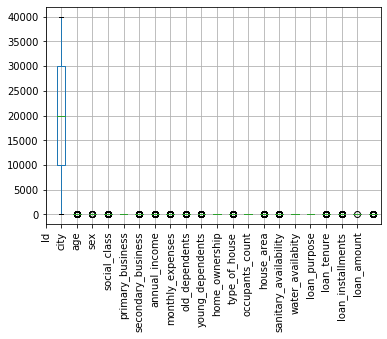

In [62]:
#outlier analysis
X_train.boxplot()
plt.xticks(list(range(len(X_train.columns))),X_train.columns, rotation='vertical')

([<matplotlib.axis.XTick at 0x1f1d7f11f08>,
 <a list of 21 Text xticklabel objects>)

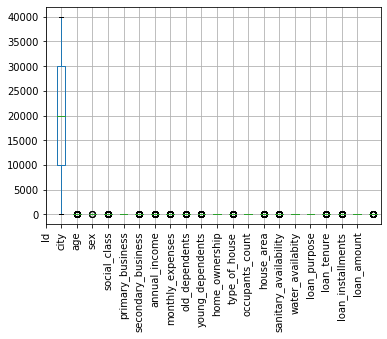

In [63]:
#outlier analysis
X_test.boxplot()
plt.xticks(list(range(len(X_test.columns))),X_test.columns, rotation='vertical')

In [64]:
# shape of our data
X_train.shape, X_test.shape

((32000, 21), (8000, 21))

In [65]:
y_train.shape, y_test.shape

((32000,), (8000,))

In [66]:
print(X_train.size)
print(y_train.size)
print(X_test.size)
print(y_test.size)

672000
32000
168000
8000


In [67]:
X_train = X_train.drop(['sanitary_availability','water_availabity'],axis=1)

X_test = X_test.drop(['sanitary_availability','water_availabity'],axis=1)

In [68]:
X_train.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,loan_purpose,loan_tenure,loan_installments,loan_amount
21370,21371,2.772589,3.433987,0.000000,1.945910,2.079442,1.098612,10.491302,8.294300,0.0,1.098612,0.693147,0.693147,1.609438,7.090910,1.945910,2.564949,2.564949,8.987322
2470,2471,2.995732,3.218876,0.693147,2.302585,2.772589,1.386294,10.827766,8.006701,0.0,0.000000,0.000000,0.693147,0.693147,6.216606,2.708050,3.218876,3.218876,9.615872
13767,13768,2.079442,3.931826,0.000000,0.693147,2.944439,1.098612,10.778977,7.863651,0.0,0.000000,0.693147,1.098612,1.098612,7.909489,2.197225,2.564949,2.564949,8.517393
13316,13317,2.197225,3.178054,0.000000,0.693147,2.772589,1.386294,9.798183,8.006701,0.0,1.098612,0.693147,0.000000,1.098612,6.398595,1.386294,2.564949,2.564949,8.922792
26374,26375,1.609438,3.044522,0.000000,0.693147,2.772589,0.693147,10.896758,8.294300,0.0,0.000000,0.693147,0.693147,1.098612,6.803505,2.564949,2.564949,2.564949,8.517393


In [69]:
X_test.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,loan_purpose,loan_tenure,loan_installments,loan_amount
12836,12837,1.945910,3.784190,0.0,0.693147,2.944439,1.609438,0.000000,8.517393,0.0,0.0,0.693147,0.693147,0.000000,0.000000,2.197225,2.564949,2.564949,8.517393
10913,10914,0.000000,3.850148,0.0,0.693147,1.609438,1.609438,0.000000,8.006701,0.0,0.0,0.693147,0.000000,0.000000,4.709530,0.693147,2.564949,2.564949,8.006701
4214,4215,0.000000,3.931826,0.0,0.693147,2.397895,1.609438,11.472114,8.987322,0.0,0.0,0.693147,0.000000,0.693147,4.753590,1.791759,2.564949,2.564949,8.517393
8198,8199,1.945910,3.761200,0.0,0.693147,2.772589,1.609438,0.000000,8.294300,0.0,0.0,0.693147,0.693147,0.000000,0.000000,2.484907,2.564949,2.564949,7.601402
31403,31404,3.044522,3.784190,0.0,1.791759,2.772589,1.609438,11.184435,8.006701,0.0,0.0,0.693147,0.693147,1.098612,5.993961,2.197225,2.564949,2.564949,9.392745


# Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
feature_scale=[feature for feature in X_train.columns if feature not in ['Id','loan_amount']]
scl=StandardScaler()
scl.fit_transform(X_train[feature_scale])

array([[ 0.76642389, -0.58188545, -0.25198886, ..., -0.06126153,
         0.01613833, -0.56758286],
       [ 1.14182309, -1.42873327,  3.95419008, ...,  0.95348717,
         7.70614212,  0.50219306],
       [-0.39967253,  1.37799872, -0.25198886, ...,  0.27335018,
         0.01613833, -0.56758286],
       ...,
       [ 0.96457282,  0.61364772, -0.25198886, ...,  0.65638347,
         0.01613833, -0.56758286],
       [-0.20152359,  0.32190037, -0.25198886, ..., -1.72924839,
         0.01613833, -0.56758286],
       [-0.62431526, -0.10411353, -0.25198886, ...,  0.95348717,
         0.01613833,  1.66852686]])

In [71]:
from sklearn.preprocessing import StandardScaler
feature_scale=[feature for feature in X_test.columns if feature not in ['Id','loan_amount']]
scl=StandardScaler()
scl.fit_transform(X_test[feature_scale])

array([[-0.54866659,  0.83447289, -0.24841902, ...,  0.44189875,
         0.01064442, -0.5621862 ],
       [-3.56580878,  1.10369265, -0.24841902, ..., -1.67396862,
         0.01064442, -0.5621862 ],
       [-3.56580878,  1.43707677, -0.24841902, ..., -0.12849104,
         0.01064442, -0.5621862 ],
       ...,
       [ 1.15473656, -2.18461679, -0.24841902, ..., -0.12849104,
         0.01064442, -0.5621862 ],
       [-2.49108105,  0.34210725, -0.24841902, ...,  1.06344888,
         0.01064442, -0.5621862 ],
       [-0.15900247, -1.15883006, -0.24841902, ...,  0.95919717,
         0.01064442, -0.5621862 ]])

In [72]:
# transform the train and test set, and add on the Id and SalePrice variables
x_train = pd.concat([X_train[['Id', 'loan_amount']].reset_index(drop=True),
                    pd.DataFrame(scl.transform(X_train[feature_scale]), columns=feature_scale)],
                    axis=1)

In [73]:
x_train.head()

,Id,loan_amount,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,loan_purpose,loan_tenure,loan_installments
0,21371,8.987322,0.733102,-0.594944,-0.248419,0.557657,-0.713904,-1.535246,0.390343,0.404814,-0.193581,0.891818,0.172818,0.454598,0.727461,0.846691,0.088361,0.010644,-0.562186
1,2471,9.615872,1.079087,-1.472961,4.025457,1.009367,0.429189,-0.443365,0.481599,-0.212290,-0.193581,-1.204100,-5.786429,0.454598,-0.896646,0.454858,1.160505,8.467338,0.516919
2,13768,8.517393,-0.341626,1.437077,-0.248419,-1.028903,0.712593,-1.535246,0.468367,-0.519233,-0.193581,-1.204100,0.172818,1.433299,-0.177967,1.213550,0.441899,0.010644,-0.562186
3,13317,8.922792,-0.159002,-1.639583,-0.248419,-1.028903,0.429189,-0.443365,0.202355,-0.212290,-0.193581,0.891818,0.172818,-1.218504,-0.177967,0.536419,-0.698881,0.010644,-0.562186
4,26375,8.517393,-1.070368,-2.184617,-0.248419,-1.028903,0.429189,-3.074167,0.500311,0.404814,-0.193581,-1.204100,0.172818,0.454598,-0.177967,0.717886,0.959197,0.010644,-0.562186


In [74]:
# transform the train and test set, and add on the Id and SalePrice variables
x_test = pd.concat([X_test[['Id', 'loan_amount']].reset_index(drop=True),
                    pd.DataFrame(scl.transform(X_test[feature_scale]), columns=feature_scale)],
                    axis=1)

In [75]:
X_test.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,loan_purpose,loan_tenure,loan_installments,loan_amount
12836,12837,1.945910,3.784190,0.0,0.693147,2.944439,1.609438,0.000000,8.517393,0.0,0.0,0.693147,0.693147,0.000000,0.000000,2.197225,2.564949,2.564949,8.517393
10913,10914,0.000000,3.850148,0.0,0.693147,1.609438,1.609438,0.000000,8.006701,0.0,0.0,0.693147,0.000000,0.000000,4.709530,0.693147,2.564949,2.564949,8.006701
4214,4215,0.000000,3.931826,0.0,0.693147,2.397895,1.609438,11.472114,8.987322,0.0,0.0,0.693147,0.000000,0.693147,4.753590,1.791759,2.564949,2.564949,8.517393
8198,8199,1.945910,3.761200,0.0,0.693147,2.772589,1.609438,0.000000,8.294300,0.0,0.0,0.693147,0.693147,0.000000,0.000000,2.484907,2.564949,2.564949,7.601402
31403,31404,3.044522,3.784190,0.0,1.791759,2.772589,1.609438,11.184435,8.006701,0.0,0.0,0.693147,0.693147,1.098612,5.993961,2.197225,2.564949,2.564949,9.392745


In [76]:
X_train = x_train.drop(['Id','loan_amount'],axis=1)
y_train = x_train['loan_amount']

X_test = x_test.drop(['Id','loan_amount'],axis=1)
y_test = x_test['loan_amount']

In [77]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32000, 17)
(32000,)
(8000, 17)
(8000,)


In [78]:
### Apply Feature Selection
# first, I specify the Lasso Regression model.
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [79]:
feature_sel_model.get_support()

array([ True,  True, False,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True])

In [80]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 17
selected features: 13


In [81]:
selected_feat

Index(['city', 'age', 'social_class', 'primary_business', 'secondary_business',
       'annual_income', 'young_dependents', 'type_of_house', 'occupants_count',
       'house_area', 'loan_purpose', 'loan_tenure', 'loan_installments'],
      dtype='object')

In [82]:

X_train=X_train[selected_feat]
X_test=X_test[selected_feat]

In [83]:

X_train.head()

,city,age,social_class,primary_business,secondary_business,annual_income,young_dependents,type_of_house,occupants_count,house_area,loan_purpose,loan_tenure,loan_installments
0,0.733102,-0.594944,0.557657,-0.713904,-1.535246,0.390343,0.891818,0.454598,0.727461,0.846691,0.088361,0.010644,-0.562186
1,1.079087,-1.472961,1.009367,0.429189,-0.443365,0.481599,-1.204100,0.454598,-0.896646,0.454858,1.160505,8.467338,0.516919
2,-0.341626,1.437077,-1.028903,0.712593,-1.535246,0.468367,-1.204100,1.433299,-0.177967,1.213550,0.441899,0.010644,-0.562186
3,-0.159002,-1.639583,-1.028903,0.429189,-0.443365,0.202355,0.891818,-1.218504,-0.177967,0.536419,-0.698881,0.010644,-0.562186
4,-1.070368,-2.184617,-1.028903,0.429189,-3.074167,0.500311,-1.204100,0.454598,-0.177967,0.717886,0.959197,0.010644,-0.562186


In [84]:
X_test.head()

,city,age,social_class,primary_business,secondary_business,annual_income,young_dependents,type_of_house,occupants_count,house_area,loan_purpose,loan_tenure,loan_installments
0,-0.548667,0.834473,-1.028903,0.712593,0.403564,-2.455111,-1.2041,0.454598,-2.125236,-2.331207,0.441899,0.010644,-0.562186
1,-3.565809,1.103693,-1.028903,-1.489003,0.403564,-2.455111,-1.2041,-1.218504,-2.125236,-0.220560,-1.673969,0.010644,-0.562186
2,-3.565809,1.437077,-1.028903,-0.188731,0.403564,0.656359,-1.2041,-1.218504,-0.896646,-0.200814,-0.128491,0.010644,-0.562186
3,-0.548667,0.740637,-1.028903,0.429189,0.403564,-2.455111,-1.2041,0.454598,-2.125236,-2.331207,0.846597,0.010644,-0.562186
4,1.154737,0.834473,0.362433,0.429189,0.403564,0.578335,-1.2041,0.454598,-0.177967,0.355077,0.441899,0.010644,-0.562186


In [85]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32000, 13)
(32000,)
(8000, 13)
(8000,)


# Model Building

The results may vary by the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In [86]:
# roc curve and auc score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression(fit_intercept=True,n_jobs=5,normalize=True)
lr_model.fit(X_train,y_train)
lr_model.predict(X_test)

array([8.54871965, 8.1167119 , 8.55744702, ..., 8.70704952, 8.66359409,
       8.9448336 ])

In [87]:
print('R-Squared score (training):{:.3f}'.format(lr_model.score(X_train,y_train)))
print('R-Squared score (test):{:.3f}'.format(lr_model.score(X_test,y_test)))

R-Squared score (training):0.361
R-Squared score (test):0.323


In [88]:
# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [89]:
# get the dataset
def get_dataset():
    X_train, y_train = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
    return X_train, y_train

In [90]:
# get a list of models to evaluate
def get_models():
    models1 = dict()
    models1['knn'] = KNeighborsRegressor()
    models1['cart'] = DecisionTreeRegressor()
    models1['svm'] = SVR()
    return models1

In [91]:
# evaluate a given model using cross-validation
def evaluate_model(model1, X_train, y_train):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model1, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>knn -101.019 (7.161)
>cart -147.296 (10.013)
>svm -162.419 (12.565)


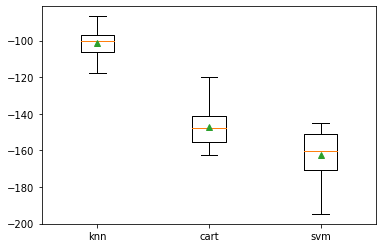

In [92]:
# define dataset
X_train, y_train = get_dataset()
# get the models to evaluate
models1 = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models1.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

We can see that in this case, KNN performs the best with a mean negative MAE of about -100

In [93]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [94]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['stacking'] = get_stacking()
    return models

In [95]:

# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

>knn -101.019 (7.161)
>cart -148.950 (10.960)
>svm -162.419 (12.565)
>stacking -56.683 (5.347)


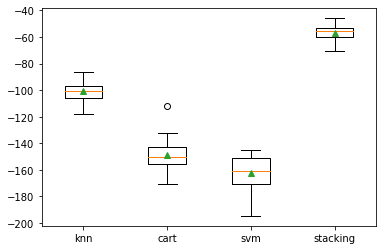

In [96]:
X_train, y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [107]:
X_test

,city,age,social_class,primary_business,secondary_business,annual_income,young_dependents,type_of_house,occupants_count,house_area,loan_purpose,loan_tenure,loan_installments
0,-0.548667,0.834473,-1.028903,0.712593,0.403564,-2.455111,-1.204100,0.454598,-2.125236,-2.331207,0.441899,0.010644,-0.562186
1,-3.565809,1.103693,-1.028903,-1.489003,0.403564,-2.455111,-1.204100,-1.218504,-2.125236,-0.220560,-1.673969,0.010644,-0.562186
2,-3.565809,1.437077,-1.028903,-0.188731,0.403564,0.656359,-1.204100,-1.218504,-0.896646,-0.200814,-0.128491,0.010644,-0.562186
3,-0.548667,0.740637,-1.028903,0.429189,0.403564,-2.455111,-1.204100,0.454598,-2.125236,-2.331207,0.846597,0.010644,-0.562186
4,1.154737,0.834473,0.362433,0.429189,0.403564,0.578335,-1.204100,0.454598,-0.177967,0.355077,0.441899,0.010644,-0.562186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.548667,0.236083,1.130073,0.429189,0.403564,0.683235,0.891818,-1.218504,0.727461,1.157148,-2.649056,0.010644,-0.562186
7996,0.733102,-1.158830,-1.906739,1.027668,0.403564,0.092392,0.118277,-1.218504,0.727461,0.536419,0.846597,0.010644,1.693425
7997,1.154737,-2.184617,-1.028903,-0.188731,0.403564,-2.455111,-1.204100,0.454598,-2.125236,-2.331207,-0.128491,0.010644,-0.562186
7998,-2.491081,0.342107,-1.028903,0.429189,0.403564,0.405007,-1.204100,0.454598,0.331944,0.045549,1.063449,0.010644,-0.562186


In this case, we can see that the stacking ensemble appears to perform better than any single model on average, achieving a mean negative MAE of about -56.

In [111]:
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
s = model.fit(X_train, y_train)

xtest_ = np.array([X])
example = example.reshape(1, -1)

yhat = model.predict(X_test)
print('Predicted Value: %.3f' % (yhat))

ValueError: query data dimension must match training data dimension

In [109]:
xtest_

array([[-0.54866659,  0.83447289, -1.02890337, ...,  0.95919717,
         0.01064442, -0.5621862 ]])

In [98]:
#lets compare our stacking score with fine tuned model

from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 5, 10]

In [99]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 6, 12, 18, 24, 30], 'min_samples_split': [2, 5, 10, 20, 30], 'min_samples_leaf': [1, 5, 10]}


In [100]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [101]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [102]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=20, min_samples_leaf=5, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=20, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=400, min_samples_split=20, min_samples_leaf=5, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=20, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=400, min_samples_split=20, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=400, min_samples_split=20, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=400, min_samples_split=20, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=400, min_samples_split=20, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=400, min_samples_split=20, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=400, min_samples_split=20, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=6 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=6, total=   1.6s
[CV] n_estimators=900, min_samples_split=2, m

[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=12, total=   0.7s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=12 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=12, total=   0.7s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=12 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=12, total=   0.6s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=12 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=12, total=   0.8s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=12 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=12, total=   0.7s
[CV] n_estimators=1000, min_samples_split=3

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=1, total=   0.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1, total=   1.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1, total=   1.1s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1, total=   1.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1, total=   1.1s
[CV] n_estimators=600, min_samples_split=10, min_sam

[CV]  n_estimators=200, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=12, total=   0.5s
[CV] n_estimators=200, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=12 
[CV]  n_estimators=200, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=12, total=   0.4s
[CV] n_estimators=300, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=1 
[CV]  n_estimators=300, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=1, total=   0.4s
[CV] n_estimators=300, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=1 
[CV]  n_estimators=300, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=1, total=   0.4s
[CV] n_estimators=300, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=1 
[CV]  n_estimators=300, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=1, total=   0.4s
[CV] n_estimators=300, min_samples_split

[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.0s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.1s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.2s
[CV] n_estimators=400, min_samples_split=30, min_samples_leaf=5, max_features=auto, max_depth=1 
[CV]  n_estimators=400, min_samples_split=30, min_samples_leaf=5, max_features=auto, max_depth=1, total=   0.7s
[CV] n_estimators=400, min_samples_split=30, min_samples_leaf=5, max_features=auto, max_depth=1 
[CV]  n_estimators=400, min_samples_split=30, min_samples_leaf=5, max_features=auto, max_depth=1, total=   0.7s
[CV] n_estimators=400, min_samples_split=30, mi

[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=6, total=   2.6s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=6 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=6, total=   3.1s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=6 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=6, total=   2.9s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=6 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=6, total=   2.6s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=18 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=18, total=   2.9s
[CV] n_estimators=1200, min_samples_split=2

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=12, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=12 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=12, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=12 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=12, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=12 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=12, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=12 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=12, total=   0.4s
[CV] n_estimators=1000, min_samples_split=30, min_sa

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  7.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [103]:
y_pred=rf_random.predict(X_test)
y_pred

ValueError: Number of features of the model must match the input. Model n_features is 20 and input n_features is 13 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_score_)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

In [ ]:
prediction_lasso=lasso_regressor.predict(X_test)
print(prediction_lasso)
prediction_ridge=ridge_regressor.predict(X_test)
print(prediction_ridge)

In [ ]:
print('lasso_regressor R-Squared score (training):{:.3f}'.format(lasso_regressor.score(X_train,y_train)))
print('lasso_regressor R-Squared score (test):{:.3f}'.format(lasso_regressor.score(X_test,y_test)))

In [ ]:
print('ridge_regressor R-Squared score (training):{:.3f}'.format(ridge_regressor.score(X_train,y_train)))
print('ridge_regressor R-Squared score (test):{:.3f}'.format(ridge_regressor.score(X_test,y_test)))

We can see that lasso_regressor and ridge_regressor performs the best with a mean negative mean_squared_error of about -100.